In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from pyliso import plotTF, plotTFs
figlist = []
MismatchList = []
from zero.data import Series, Response, NoiseDensity
from zero import Circuit
from zero.analysis import AcNoiseAnalysis, AcSignalAnalysis
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9'] #5
lsList = ['-','--','-.',':']  #4

In [2]:
from NorthPMCZero import *

PMC Gain set to 10 dB.
PZT Capacitance Added


In [3]:
PMCGain(NPMC, G=30)
PZTConnected(NPMC, False)

PMC Gain set to 30 dB.
PZT Capacitance Removed


In [4]:
data = np.loadtxt('NPMC_fp1_to_MixOut_10-09-2019_101251.txt')
ff = data[:,0]
Meas = data[:,1]*np.exp(1j*data[:,2]*np.pi/180)
analysis = AcSignalAnalysis(circuit=NPMC)
TFfromfp1 = analysis.calculate(frequencies=ff, input_type="voltage", node="n0")
Sim = TFfromfp1.get_response(sink='nfp3test').complex_magnitude
TFDict = {}
TFDict['Measured'] = [ff,Meas]
TFDict['Simulated'] = [ff,Sim]

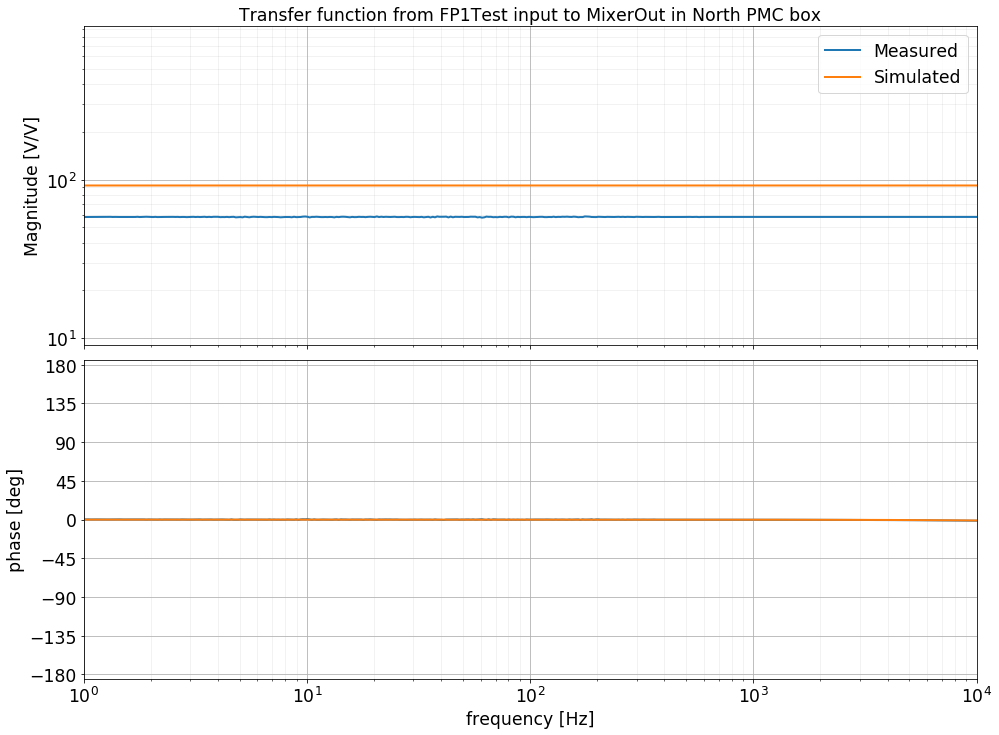

In [5]:
tfsMat = list(TFDict.items())
fig = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig.axes[0]
phase_ax = fig.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from FP1Test input to MixerOut in North PMC box')
mag_ax.legend()
figlist += [fig]

In [6]:
data = np.loadtxt('NPMC_fp1_to_OutMon')
ff = data[:,0]
Meas2 = data[:,1]*np.exp(1j*data[:,2]*np.pi/180)
Sim2 = TFfromfp1.get_response(sink='nfp4test').complex_magnitude
TFDict2 = {}
TFDict2['Measured'] = [ff,Meas2]
TFDict2['Simulated'] = [ff,Sim2]

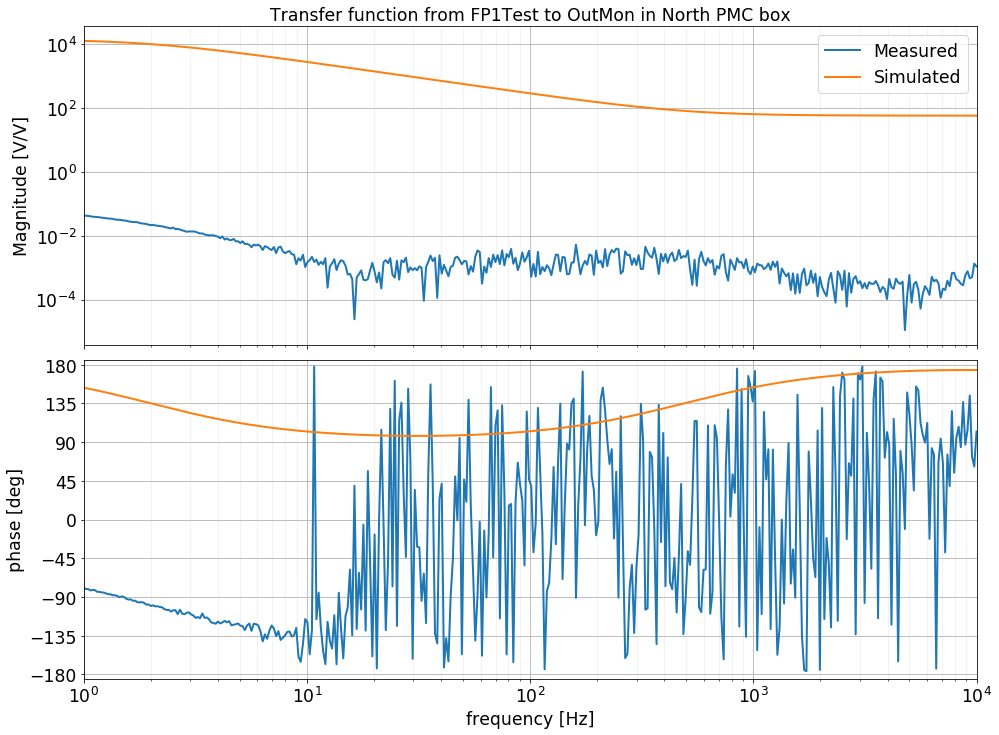

In [7]:
tfsMat = list(TFDict2.items())
fig = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig.axes[0]
phase_ax = fig.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from FP1Test to OutMon in North PMC box')
mag_ax.legend()
figlist += [fig]

In [ ]:
data = np.loadtxt('NPMC_fp2_to_tp4_09-09-2019_155128.txt')
ff = data[:,0]
Meas4 = data[:,1]*np.exp(1j*data[:,2]*np.pi/180)
Sim4 = TFfromfp2.get_response(sink='nTP4').complex_magnitude
TFDict4 = {}
TFDict4['Measured'] = [ff,Meas4/Meas2]
TFDict4['Simulated'] = [ff,Sim4/Sim2]

In [ ]:
tfsMat = list(TFDict4.items())
fig = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig.axes[0]
phase_ax = fig.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP2 to TP4 in North PMC box')
mag_ax.legend()
figlist += [fig]

In [ ]:
data = np.loadtxt('NPMC_fp2_to_tp3_09-09-2019_161358.txt')
ff = data[:,0]
Meas3 = data[:,1]*np.exp(1j*data[:,2]*np.pi/180)
Sim3 = TFfromfp2.get_response(sink='nTP3').complex_magnitude
TFDict3 = {}
TFDict3['Measured'] = [ff,Meas3/Meas4]
TFDict3['Simulated'] = [ff,Sim3/Sim4]

In [ ]:
tfsMat = list(TFDict3.items())
fig = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig.axes[0]
phase_ax = fig.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
          label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP4 to TP3 in North PMC box')
mag_ax.legend()
#mag_ax.set_ylim((1e-3,1))
figlist += [fig]

In [ ]:
pp = PdfPages('NPMC_openInvestifation.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()